In [1]:
# importing libraries

import pandas as pd
import numpy as np
import dateutil.parser
import datetime
from datetime import datetime as dt
from datetime import time
from datetime import timedelta
from datetime import date
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
# reading data from URL and saving as csv file
download = True

if download:
  dates = ['220108','220115','220122','220129','220205','220212','220219','220226','220305','220312']

  weeks_data = []
  for weeks in dates:
    MTA_url = f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{weeks}.txt"
    weeks_data.append(pd.read_csv(MTA_url))

  MTA_data = pd.concat(weeks_data)
  MTA_data.to_csv('filtred_data.csv')
else:
  filtered_data = pd.read_csv('filtered_data.csv')

In [3]:
# checking general info about dataframe
MTA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099499 entries, 0 to 210237
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [4]:
# checking dataframe's first 10 rows
MTA_data.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,23:00:00,REGULAR,7675936,2649668
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2022,03:00:00,REGULAR,7675940,2649670
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2022,07:00:00,REGULAR,7675942,2649674
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2022,11:00:00,REGULAR,7675957,2649727
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/02/2022,15:00:00,REGULAR,7675986,2649769


In [5]:
# checking basic descriptive statistics for numerical columns
MTA_data.describe()

,ENTRIES,EXITS
count,2.099499e+06,2.099499e+06
mean,4.277153e+07,3.444712e+07
std,2.233300e+08,1.969431e+08
min,0.000000e+00,0.000000e+00
25%,2.466785e+05,1.268795e+05
50%,1.357864e+06,8.736470e+05
75%,5.979334e+06,3.971504e+06
max,2.147338e+09,2.122532e+09


In [6]:
# checking columns names
MTA_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [7]:
# rename a column and eliminate spaces at columns names
MTA_data.rename(columns = {"C/A" : "CA"},inplace = True)
MTA_data.columns = [column.strip() for column in MTA_data.columns]

MTA_data.head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657


In [8]:
# checking dataframe's size
MTA_data.shape

(2099499, 11)

In [9]:
MTA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099499 entries, 0 to 210237
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   CA        object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 192.2+ MB


In [10]:
# checking null values based on columns
MTA_data.isna().sum()

CA          0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [11]:
# creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"
MTA_data['DATETIME'] = pd.to_datetime(MTA_data['DATE'] + ' ' + MTA_data['TIME'])

In [12]:
MTA_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099499 entries, 0 to 210237
Data columns (total 12 columns):
 #   Column    Dtype         
---  ------    -----         
 0   CA        object        
 1   UNIT      object        
 2   SCP       object        
 3   STATION   object        
 4   LINENAME  object        
 5   DIVISION  object        
 6   DATE      object        
 7   TIME      object        
 8   DESC      object        
 9   ENTRIES   int64         
 10  EXITS     int64         
 11  DATETIME  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 208.2+ MB


In [13]:
# creating a column that contains the days of the week

MTA_data['DAYS'] = MTA_data['DATETIME'].dt.day_name()

In [14]:
# checking and sorting entry values
MTA_data.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME']).ENTRIES.count().reset_index().sort_values('ENTRIES', ascending = False)

,CA,UNIT,SCP,STATION,DATETIME,ENTRIES
502861,N039,R251,01-00-00,96 ST,2022-01-25 19:00:00,2
503698,N039,R251,01-00-02,96 ST,2022-01-25 19:00:00,2
1432243,R158,R084,00-06-00,59 ST COLUMBUS,2022-01-21 23:00:00,2
60252,A037,R170,05-00-03,14 ST-UNION SQ,2022-01-22 04:00:00,2
503280,N039,R251,01-00-01,96 ST,2022-01-25 19:00:00,2
...,...,...,...,...,...,...
699828,N128,R200,00-00-00,EUCLID AV,2022-01-29 19:00:00,1
699827,N128,R200,00-00-00,EUCLID AV,2022-01-29 15:00:00,1
699826,N128,R200,00-00-00,EUCLID AV,2022-01-29 11:00:00,1
699825,N128,R200,00-00-00,EUCLID AV,2022-01-29 07:00:00,1


In [15]:
MTA_data.groupby(['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME']).EXITS.count().reset_index().sort_values('EXITS', ascending = False)

,CA,UNIT,SCP,STATION,DATETIME,EXITS
502861,N039,R251,01-00-00,96 ST,2022-01-25 19:00:00,2
503698,N039,R251,01-00-02,96 ST,2022-01-25 19:00:00,2
1432243,R158,R084,00-06-00,59 ST COLUMBUS,2022-01-21 23:00:00,2
60252,A037,R170,05-00-03,14 ST-UNION SQ,2022-01-22 04:00:00,2
503280,N039,R251,01-00-01,96 ST,2022-01-25 19:00:00,2
...,...,...,...,...,...,...
699828,N128,R200,00-00-00,EUCLID AV,2022-01-29 19:00:00,1
699827,N128,R200,00-00-00,EUCLID AV,2022-01-29 15:00:00,1
699826,N128,R200,00-00-00,EUCLID AV,2022-01-29 11:00:00,1
699825,N128,R200,00-00-00,EUCLID AV,2022-01-29 07:00:00,1


In [16]:
MTA_data.drop_duplicates(subset = ['CA', 'UNIT', 'SCP', 'STATION', 'DATETIME'], inplace = True)

In [17]:
# finding the difference in values between consecutive rows to find out traffic flow between timings
MTA_data['ENTRY_RAW'] = MTA_data['ENTRIES'].diff()
MTA_data['EXIT_RAW'] = MTA_data['EXITS'].diff()
MTA_data

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYS,ENTRY_RAW,EXIT_RAW
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548,2022-01-01 03:00:00,Saturday,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,2022-01-01 07:00:00,Saturday,4.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,2022-01-01 11:00:00,Saturday,11.0,43.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,2022-01-01 15:00:00,Saturday,8.0,32.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,2022-01-01 19:00:00,Saturday,25.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210233,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,04:00:00,REGULAR,0,23,2022-03-11 04:00:00,Friday,0.0,0.0
210234,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,08:00:00,REGULAR,0,23,2022-03-11 08:00:00,Friday,0.0,0.0
210235,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,12:00:00,REGULAR,0,23,2022-03-11 12:00:00,Friday,0.0,0.0
210236,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,16:00:00,REGULAR,0,23,2022-03-11 16:00:00,Friday,0.0,0.0


In [18]:
# checking reset of entry counter values
MTA_data['ENTRY_RAW'][MTA_data['ENTRY_RAW'] < 0]

42        -888227.0
84       -5313107.0
168      -1588046.0
336      -2735065.0
378      -9067888.0
            ...    
209902    -230999.0
209944    -394261.0
210070   -3194243.0
210154   -2861078.0
210196    -328033.0
Name: ENTRY_RAW, Length: 44777, dtype: float64

In [19]:
MTA_data['ENTRY_RAW'][MTA_data['ENTRY_RAW'] > 10000]

126        232723.0
210       6116175.0
252       1392871.0
294       4679211.0
462        268394.0
            ...    
209608      42528.0
209818    1289451.0
209986    1072041.0
210028    2906490.0
210112    2387201.0
Name: ENTRY_RAW, Length: 24293, dtype: float64

In [21]:
# checking reset of exit counter values
MTA_data['EXIT_RAW'][MTA_data['EXIT_RAW'] < 0]

42       -1086561.0
126      -2913652.0
168      -2528890.0
252      -3141444.0
294      -2484982.0
            ...    
209776     -65536.0
209860     -18727.0
209944    -141944.0
210070     -24725.0
210154    -400799.0
Name: EXIT_RAW, Length: 36946, dtype: float64

In [22]:
MTA_data['EXIT_RAW'][MTA_data['EXIT_RAW'] > 10000]

84         4044272.0
210        6925579.0
462          30504.0
504        7932031.0
588       13141047.0
             ...    
209818       29334.0
209902      131104.0
209986       27515.0
210028       29553.0
210112      367931.0
Name: EXIT_RAW, Length: 22924, dtype: float64

In [23]:
# setting the anomaly values due to reset of counters to the uniform NaN values
MTA_data['ENTRY_RAW'][MTA_data['ENTRY_RAW'] > 10000]= np.nan
MTA_data['ENTRY_RAW'][MTA_data['ENTRY_RAW'] < 0]= np.nan
MTA_data['EXIT_RAW'][MTA_data['EXIT_RAW'] > 10000]= np.nan
MTA_data['EXIT_RAW'][MTA_data['EXIT_RAW'] < 0]= np.nan

<ipython-input-23-833ec8ee6ad4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MTA_data['ENTRY_RAW'][MTA_data['ENTRY_RAW'] > 10000]= np.nan
<ipython-input-23-833ec8ee6ad4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MTA_data['ENTRY_RAW'][MTA_data['ENTRY_RAW'] < 0]= np.nan
<ipython-input-23-833ec8ee6ad4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MTA_data['EXIT_RAW'][MTA_data['EXIT_RAW'] > 10000]= np.nan
<ipython-input-23-8

In [24]:
MTA_data.reset_index(inplace=True)

In [25]:
MTA_data.drop('index',axis=1,inplace=True)
MTA_data

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYS,ENTRY_RAW,EXIT_RAW
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548,2022-01-01 03:00:00,Saturday,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,2022-01-01 07:00:00,Saturday,4.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,2022-01-01 11:00:00,Saturday,11.0,43.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,2022-01-01 15:00:00,Saturday,8.0,32.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,2022-01-01 19:00:00,Saturday,25.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099487,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,04:00:00,REGULAR,0,23,2022-03-11 04:00:00,Friday,0.0,0.0
2099488,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,08:00:00,REGULAR,0,23,2022-03-11 08:00:00,Friday,0.0,0.0
2099489,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,12:00:00,REGULAR,0,23,2022-03-11 12:00:00,Friday,0.0,0.0
2099490,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/11/2022,16:00:00,REGULAR,0,23,2022-03-11 16:00:00,Friday,0.0,0.0


In [26]:
# for each NaN values, replace it with the mean of values before and after the NaN value
raw_list = list(MTA_data['ENTRY_RAW'])
ind = 0
for i in raw_list:
    if np.isnan(i) == 1:
        raw_list[ind] = np.nanmean([raw_list[ind-2],raw_list[ind-1],raw_list[ind+1],raw_list[ind+2]])
    ind += 1
    
MTA_data['ENTRY_RAW_1'] = raw_list

In [27]:
# check for any NaN values remaining
MTA_data['ENTRY_RAW_1'].isnull().sum()

0

In [28]:
raw_list = list(MTA_data['EXIT_RAW'])
ind = 0
for i in raw_list:
    if np.isnan(i) == 1:
        raw_list[ind] = np.nanmean([raw_list[ind-1],raw_list[ind+1]])
    ind += 1
    
MTA_data['EXIT_RAW_1'] = raw_list

In [29]:
MTA_data['EXIT_RAW_1'].isnull().sum()

0

In [ ]:
# creating a TRAFFIC column that contains total traffic from entry and exit between each timing
MTA_data['TRAFFIC'] = MTA_data['ENTRY_RAW_1'] + MTA_data['EXIT_RAW_1']

MTA_data['DATE'] = pd.to_datetime(MTA_data['DATE'])
MTA_data['TIME']=pd.to_datetime(MTA_data['TIME'],format='%H:%M:%S').dt.time

# assigning an index value for each day of the week
MTA_data['DAYS_INDEX'] = MTA_data['DATE'].dt.weekday
MTA_data

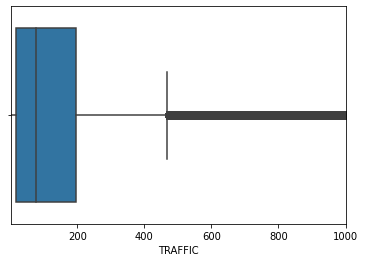

In [31]:
fig, ax = plt.subplots()
sns.boxplot(x = MTA_data['TRAFFIC'], ax = ax)
ax.set_xlim(1,1000)
plt.show()

In [33]:
# the 10 busiest stations by traffic value
top_stations = MTA_data.groupby('STATION')[['TRAFFIC']].agg({'TRAFFIC': 'sum'}).sort_values("TRAFFIC" , ascending = False).head(10)
top_stations.head(10)

,TRAFFIC
STATION,
34 ST-PENN STA,7.365204e+06
GRD CNTRL-42 ST,6.048466e+06
34 ST-HERALD SQ,5.639998e+06
86 ST,5.269109e+06
42 ST-PORT AUTH,5.102883e+06
14 ST-UNION SQ,4.950777e+06
23 ST,4.950763e+06
125 ST,4.503841e+06
TIMES SQ-42 ST,4.503217e+06


In [34]:
def human_format(num, pos):
  """
  makes it easy to read large numbers
  """
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

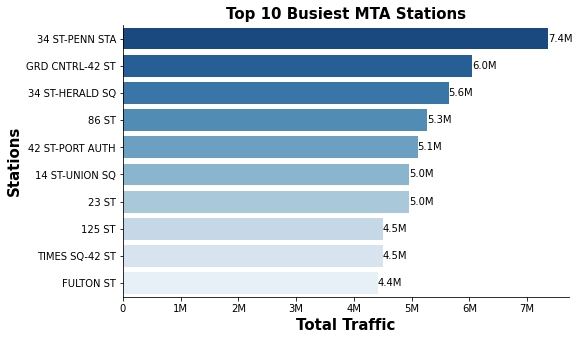

In [35]:
# creating a horizontal bar plot of top 10 stations
plt.figure(figsize = [8,5])
ax = sns.barplot(data = top_stations.head(10).reset_index(), x = 'TRAFFIC', y = 'STATION', palette = 'Blues_r')
plt.xlabel('Total Traffic', weight = 'bold', fontsize = 15)
plt.ylabel('Stations', weight = 'bold', fontsize = 15)
ax.xaxis.set_major_formatter(FuncFormatter(human_format))
plt.title('Top 10 Busiest MTA Stations', weight = 'bold', fontsize = '15')
for p in ax.patches:
       ax.annotate(str(float('{:.1f}'.format(p.get_width()/1000000)))+'M', (p.get_width(), p.get_y()+0.5))
sns.despine()
plt.savefig('barplot.png', transparent = True, bbox_inches = 'tight')

In [36]:
top_station_day_index = MTA_data.groupby(['STATION','DAYS',"DAYS_INDEX"]).agg({'TRAFFIC':'sum'}).reset_index()[["STATION","DAYS","TRAFFIC","DAYS_INDEX"]]
top_station_day_index.head()

,STATION,DAYS,TRAFFIC,DAYS_INDEX
0,1 AV,Friday,238815.666667,4
1,1 AV,Monday,197640.500000,0
2,1 AV,Saturday,247644.416667,5
3,1 AV,Sunday,121992.000000,6
4,1 AV,Thursday,232811.250000,3


In [37]:
# most busiest station's traffic values by day
penn = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "34 ST-PENN STA" ].sort_values("DAYS_INDEX",ascending = True)
penn

,STATION,DAYS,TRAFFIC,DAYS_INDEX
428,34 ST-PENN STA,Monday,1.066542e+06,0
432,34 ST-PENN STA,Tuesday,1.236959e+06,1
433,34 ST-PENN STA,Wednesday,1.254119e+06,2
431,34 ST-PENN STA,Thursday,1.256233e+06,3
427,34 ST-PENN STA,Friday,1.189946e+06,4
429,34 ST-PENN STA,Saturday,7.654435e+05,5
430,34 ST-PENN STA,Sunday,5.959613e+05,6


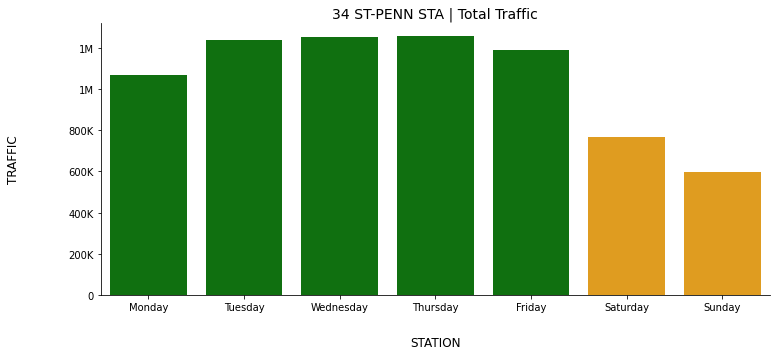

In [38]:
# creating a bar plot for most busiest station
clrs = [ 'orange' if x < 800000 else 'Green' for x in penn.TRAFFIC.values]
fig, ax = plt.subplots(figsize = (12,5))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x = penn.DAYS , y = 'TRAFFIC' , data = penn , ax = ax ,  palette = clrs)
ax.set_title('34 ST-PENN STA | Total Traffic', fontsize = 14)
ax.set_ylabel('TRAFFIC' , rotation = 90 , fontsize = 12)
ax.set_xlabel('STATION', fontsize = 12)
ax.yaxis.set_label_coords(-0.12,0.5)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.xaxis.set_label_coords(0.5,- 0.15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [39]:
MTA_10 = MTA_data[MTA_data['STATION'].isin(list(top_stations.head(10).index))]
MTA_10

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYS,ENTRY_RAW,EXIT_RAW,ENTRY_RAW_1,EXIT_RAW_1,TRAFFIC,DAYS_INDEX
2991,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,03:00:00,REGULAR,10223897,12984373,2022-01-01 03:00:00,Saturday,NaN,NaN,18.5,24.0,42.5,5
2992,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,07:00:00,REGULAR,10223916,12984418,2022-01-01 07:00:00,Saturday,19.0,45.0,19.0,45.0,64.0,5
2993,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,11:00:00,REGULAR,10223954,12984547,2022-01-01 11:00:00,Saturday,38.0,129.0,38.0,129.0,167.0,5
2994,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,15:00:00,REGULAR,10224045,12984779,2022-01-01 15:00:00,Saturday,91.0,232.0,91.0,232.0,323.0,5
2995,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,19:00:00,REGULAR,10224158,12985145,2022-01-01 19:00:00,Saturday,113.0,366.0,113.0,366.0,479.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064763,R305,R206,01-00-02,125 ST,23,IRT,2022-03-11,04:00:00,REGULAR,246016853,141576774,2022-03-11 04:00:00,Friday,11.0,43.0,11.0,43.0,54.0,4
2064764,R305,R206,01-00-02,125 ST,23,IRT,2022-03-11,08:00:00,REGULAR,246016903,141576876,2022-03-11 08:00:00,Friday,50.0,102.0,50.0,102.0,152.0,4
2064765,R305,R206,01-00-02,125 ST,23,IRT,2022-03-11,12:00:00,REGULAR,246017005,141577068,2022-03-11 12:00:00,Friday,102.0,192.0,102.0,192.0,294.0,4
2064766,R305,R206,01-00-02,125 ST,23,IRT,2022-03-11,16:00:00,REGULAR,246017169,141577331,2022-03-11 16:00:00,Friday,164.0,263.0,164.0,263.0,427.0,4


In [40]:
# finding all traffic a day in the 10 stations
top_stations_day = MTA_10.groupby(['STATION','DAYS'])['TRAFFIC'].sum()
top_stations_day

STATION         DAYS     
125 ST          Friday       731980.933613
                Monday       666672.993805
                Saturday     483668.837499
                Sunday       371810.122314
                Thursday     758448.823147
                                 ...      
TIMES SQ-42 ST  Saturday     606948.739583
                Sunday       452745.471191
                Thursday     728284.000000
                Tuesday      687774.333938
                Wednesday    720710.916675
Name: TRAFFIC, Length: 70, dtype: float64

In [41]:
matrix_station_day = top_stations_day.unstack()
matrix_station_day.reset_index()
matrix_station_day = matrix_station_day.reindex(columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
matrix_station_day = matrix_station_day.reindex(index = list(top_stations.head(10).index))
matrix_station_day

DAYS,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
34 ST-PENN STA,1.066542e+06,1.236959e+06,1.254119e+06,1.256233e+06,1.189946e+06,765443.524362,595961.298810
GRD CNTRL-42 ST,8.381319e+05,1.001048e+06,1.031489e+06,1.025507e+06,9.168866e+05,856468.694041,378935.048032
34 ST-HERALD SQ,8.266687e+05,8.876557e+05,9.068480e+05,9.173040e+05,9.006464e+05,690520.855903,510354.428304
86 ST,7.876590e+05,8.666092e+05,8.799420e+05,9.025320e+05,8.731410e+05,552694.250000,406531.500000
42 ST-PORT AUTH,7.203504e+05,8.094143e+05,8.365847e+05,8.433223e+05,8.295666e+05,593180.310764,470464.420654
14 ST-UNION SQ,6.857402e+05,7.702180e+05,8.211270e+05,8.149880e+05,8.040313e+05,608720.083333,445952.000000
23 ST,7.127880e+05,8.192750e+05,8.542745e+05,8.562348e+05,7.786606e+05,556657.122561,372872.954834
125 ST,6.666730e+05,7.347620e+05,7.564977e+05,7.584488e+05,7.319809e+05,483668.837499,371810.122314
TIMES SQ-42 ST,6.131915e+05,6.877743e+05,7.207109e+05,7.282840e+05,6.935623e+05,606948.739583,452745.471191


In [42]:
# formating the values
matrix_station_day.applymap(lambda x:str(round(x / 1000000, 1)) + 'M')

DAYS,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
34 ST-PENN STA,1.1M,1.2M,1.3M,1.3M,1.2M,0.8M,0.6M
GRD CNTRL-42 ST,0.8M,1.0M,1.0M,1.0M,0.9M,0.9M,0.4M
34 ST-HERALD SQ,0.8M,0.9M,0.9M,0.9M,0.9M,0.7M,0.5M
86 ST,0.8M,0.9M,0.9M,0.9M,0.9M,0.6M,0.4M
42 ST-PORT AUTH,0.7M,0.8M,0.8M,0.8M,0.8M,0.6M,0.5M
14 ST-UNION SQ,0.7M,0.8M,0.8M,0.8M,0.8M,0.6M,0.4M
23 ST,0.7M,0.8M,0.9M,0.9M,0.8M,0.6M,0.4M
125 ST,0.7M,0.7M,0.8M,0.8M,0.7M,0.5M,0.4M
TIMES SQ-42 ST,0.6M,0.7M,0.7M,0.7M,0.7M,0.6M,0.5M


In [43]:
array = np.array(matrix_station_day.applymap(lambda x:str(round(x / 1000000, 1)) + 'M'))
array

array([['1.1M', '1.2M', '1.3M', '1.3M', '1.2M', '0.8M', '0.6M'],
       ['0.8M', '1.0M', '1.0M', '1.0M', '0.9M', '0.9M', '0.4M'],
       ['0.8M', '0.9M', '0.9M', '0.9M', '0.9M', '0.7M', '0.5M'],
       ['0.8M', '0.9M', '0.9M', '0.9M', '0.9M', '0.6M', '0.4M'],
       ['0.7M', '0.8M', '0.8M', '0.8M', '0.8M', '0.6M', '0.5M'],
       ['0.7M', '0.8M', '0.8M', '0.8M', '0.8M', '0.6M', '0.4M'],
       ['0.7M', '0.8M', '0.9M', '0.9M', '0.8M', '0.6M', '0.4M'],
       ['0.7M', '0.7M', '0.8M', '0.8M', '0.7M', '0.5M', '0.4M'],
       ['0.6M', '0.7M', '0.7M', '0.7M', '0.7M', '0.6M', '0.5M'],
       ['0.6M', '0.7M', '0.7M', '0.7M', '0.7M', '0.6M', '0.3M']],
      dtype=object)

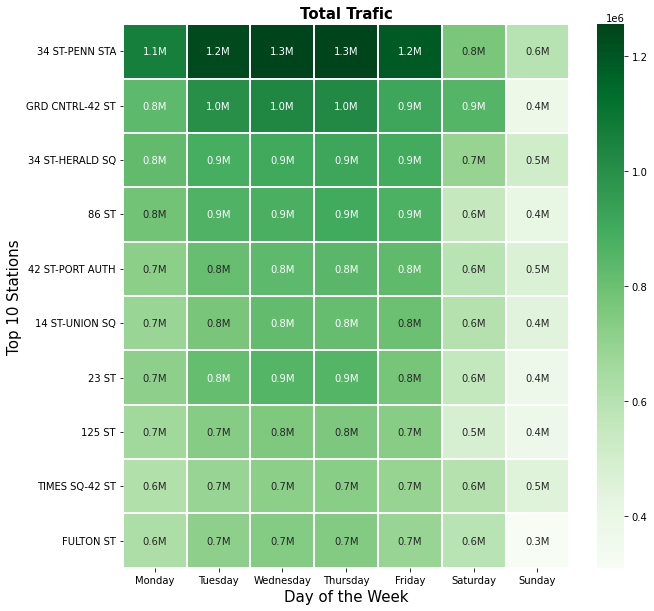

In [44]:
# creating heatmap of traffic a day in the top 10 station
fig2 = plt.figure(figsize = [10,10])
cmap = sns.cubehelix_palette(light = 1, as_cmap = True)
ax2 = sns.heatmap(matrix_station_day, cmap = 'Greens', linecolor = 'white', linewidths = 1, annot = array, fmt = '')
plt.xlabel('Day of the Week', fontsize = 15)
plt.ylabel('Top 10 Stations', fontsize = 15)
ax.yaxis.set_major_formatter(FuncFormatter(human_format))   
plt.title('Total Trafic', weight = 'bold', fontsize = 15)
plt.savefig('heatmap1.png', transparent = True, bbox_inches = 'tight')

In [45]:
penn = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "34 ST-PENN STA" ].sort_values("DAYS_INDEX",ascending = True)

In [46]:
grd = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "GRD CNTRL-42 ST" ].sort_values("DAYS_INDEX",ascending = True)

In [47]:
herald = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "34 ST-HERALD SQ" ].sort_values("DAYS_INDEX",ascending = True)

In [48]:
st86 = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "86 ST" ].sort_values("DAYS_INDEX",ascending = True)

In [49]:
port = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "42 ST-PORT AUTH" ].sort_values("DAYS_INDEX",ascending = True)

In [50]:
union = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "14 ST-UNION SQ" ].sort_values("DAYS_INDEX",ascending = True)

In [51]:
st23 = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "23 ST" ].sort_values("DAYS_INDEX",ascending = True)

In [52]:
st125 = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "125 ST" ].sort_values("DAYS_INDEX",ascending = True)

In [53]:
times = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "TIMES SQ-42 ST" ].sort_values("DAYS_INDEX",ascending = True)

In [54]:
fulton = top_station_day_index [ top_station_day_index.loc[: , "STATION"] == "FULTON ST" ].sort_values("DAYS_INDEX",ascending = True)

In [55]:
stations = [penn, grd, herald ,st86 ,port]

In [56]:
top10_line_Data = pd.concat(stations)
top10_line_Data

,STATION,DAYS,TRAFFIC,DAYS_INDEX
428,34 ST-PENN STA,Monday,1.066542e+06,0
432,34 ST-PENN STA,Tuesday,1.236959e+06,1
433,34 ST-PENN STA,Wednesday,1.254119e+06,2
431,34 ST-PENN STA,Thursday,1.256233e+06,3
427,34 ST-PENN STA,Friday,1.189946e+06,4
429,34 ST-PENN STA,Saturday,7.654435e+05,5
430,34 ST-PENN STA,Sunday,5.959613e+05,6
1632,GRD CNTRL-42 ST,Monday,8.381319e+05,0
1636,GRD CNTRL-42 ST,Tuesday,1.001048e+06,1
1637,GRD CNTRL-42 ST,Wednesday,1.031489e+06,2


In [57]:
def human_format(num, pos):
  """
  Makes it easy to read large numbers
  """
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.1f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

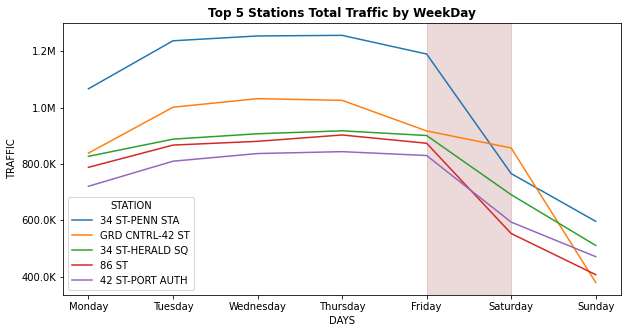

In [58]:
# creating a line plot for top 5 busiest station's traffic values by day
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data = top10_line_Data, x= "DAYS", y = "TRAFFIC", hue = "STATION")
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.axvspan("Friday", "Saturday", alpha = 0.15, color = 'maroon')
ax.set_title('Top 5 Stations Total Traffic by WeekDay', weight = 'bold')
plt.savefig('linemap.png', transparent = True, bbox_inches = 'tight')

In [59]:
def timeperiod(time):
  """
  takes the value in the time column and assigns an appropriate time period label
  """  
    if time >= datetime.time(0,0,0) and time < datetime.time(4,0,0):
        return "12am-4am"
    elif time >= datetime.time(4,0,0) and time < datetime.time(8,0,0):
        return "4am-8am"
    elif time >= datetime.time(8,0,0) and time < datetime.time(12,0,0):
        return "8am-12pm"
    elif time >= datetime.time(12,0,0) and time < datetime.time(16,0,0):
        return "12pm-4pm"    
    elif time >= datetime.time(16,0,0) and time < datetime.time(20,0,0):
        return "4pm-8pm"    
    else:
        return "8pm-12am"  

In [66]:
MTA_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279342 entries, 2991 to 2064767
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CA           279342 non-null  object        
 1   UNIT         279342 non-null  object        
 2   SCP          279342 non-null  object        
 3   STATION      279342 non-null  object        
 4   LINENAME     279342 non-null  object        
 5   DIVISION     279342 non-null  object        
 6   DATE         279342 non-null  datetime64[ns]
 7   TIME         279342 non-null  object        
 8   DESC         279342 non-null  object        
 9   ENTRIES      279342 non-null  int64         
 10  EXITS        279342 non-null  int64         
 11  DATETIME     279342 non-null  datetime64[ns]
 12  DAYS         279342 non-null  object        
 13  ENTRY_RAW    268576 non-null  float64       
 14  EXIT_RAW     271707 non-null  float64       
 15  ENTRY_RAW_1  279342 non-null  

In [61]:
MTA_10['TIME']=pd.to_datetime(MTA_10['TIME'],format='%H:%M:%S').dt.time

<ipython-input-61-04709021715e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MTA_10['TIME']=pd.to_datetime(MTA_10['TIME'],format='%H:%M:%S').dt.time


In [62]:
MTA_10['TIME_PERIOD'] = MTA_10['TIME'].apply(timeperiod)
MTA_10

<ipython-input-62-9732fad9c69b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MTA_10['TIME_PERIOD'] = MTA_10['TIME'].apply(timeperiod)


,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,DAYS,ENTRY_RAW,EXIT_RAW,ENTRY_RAW_1,EXIT_RAW_1,TRAFFIC,DAYS_INDEX,TIME_PERIOD
2991,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,03:00:00,REGULAR,10223897,12984373,2022-01-01 03:00:00,Saturday,NaN,NaN,18.5,24.0,42.5,5,12am-4am
2992,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,07:00:00,REGULAR,10223916,12984418,2022-01-01 07:00:00,Saturday,19.0,45.0,19.0,45.0,64.0,5,4am-8am
2993,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,11:00:00,REGULAR,10223954,12984547,2022-01-01 11:00:00,Saturday,38.0,129.0,38.0,129.0,167.0,5,8am-12pm
2994,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,15:00:00,REGULAR,10224045,12984779,2022-01-01 15:00:00,Saturday,91.0,232.0,91.0,232.0,323.0,5,12pm-4pm
2995,A021,R032,01-00-00,TIMES SQ-42 ST,ACENQRS1237W,BMT,2022-01-01,19:00:00,REGULAR,10224158,12985145,2022-01-01 19:00:00,Saturday,113.0,366.0,113.0,366.0,479.0,5,4pm-8pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064763,R305,R206,01-00-02,125 ST,23,IRT,2022-03-11,04:00:00,REGULAR,246016853,141576774,2022-03-11 04:00:00,Friday,11.0,43.0,11.0,43.0,54.0,4,4am-8am
2064764,R305,R206,01-00-02,125 ST,23,IRT,2022-03-11,08:00:00,REGULAR,246016903,141576876,2022-03-11 08:00:00,Friday,50.0,102.0,50.0,102.0,152.0,4,8am-12pm
2064765,R305,R206,01-00-02,125 ST,23,IRT,2022-03-11,12:00:00,REGULAR,246017005,141577068,2022-03-11 12:00:00,Friday,102.0,192.0,102.0,192.0,294.0,4,12pm-4pm
2064766,R305,R206,01-00-02,125 ST,23,IRT,2022-03-11,16:00:00,REGULAR,246017169,141577331,2022-03-11 16:00:00,Friday,164.0,263.0,164.0,263.0,427.0,4,4pm-8pm


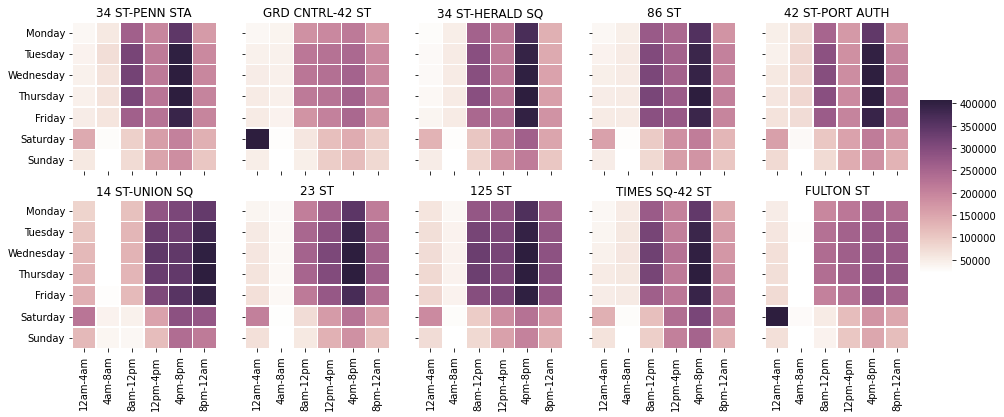

In [63]:
# creating heatmap of traffic baed on day and time period for each of the 10 stations
matrix_list= []
for station in list(top_stations.head(10).index):
    df_station = MTA_10[MTA_10['STATION'] == station]
    group_day_time = df_station.groupby(['DAYS','TIME_PERIOD'])['TRAFFIC'].sum()
    matrix_day_time = group_day_time.unstack()
    matrix_day_time.reset_index()   
    matrix_day_time = matrix_day_time.reindex(index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    matrix_day_time = matrix_day_time.reindex(columns=["12am-4am", "4am-8am", "8am-12pm", "12pm-4pm", "4pm-8pm", "8pm-12am"])
    matrix_list.append(matrix_day_time)

fig, axn = plt.subplots(2,5, sharex = True, sharey = True, figsize = (15,6))
cmap = sns.cubehelix_palette(light = 1, as_cmap = True)
cbar_ax = fig.add_axes([.91, .3, .03, .4])  

for i, ax in enumerate(axn.flat):
    station = matrix_list[i]
    sns.heatmap(station, ax = ax, cmap = cmap,
                cbar = i == 0,
                cbar_ax = None if i else cbar_ax,
                linecolor = 'white', linewidths = 0.5)
    ax.set_title(list(top_stations.head(10).index)[i])
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.savefig('heatmap2.png',transparent = True, bbox_inches = 'tight')

In [ ]:
# getting census data
cencus = pd.read_excel('Census_data.xlsx')
cencus.dropna(axis = 1, inplace = True)
cencus.head()

,Borough,Population,FemalePercent,BachelorsDegreePercent,MedianIncome,TotalEmployer,TotalEmployment,AnnualPayroll,AllFirms,WomenOwnedFirms
0,Manhattan,1694251,52.4,62.6,93956,99048,2355277,275961220,86330,18965
1,Bronx,1472654,52.6,20.9,43726,18183,284865,13533992,15640,2838
2,Queens,2405464,51.1,33.9,75886,49999,603514,29388799,44964,10125
3,Staten Island,495747,51.1,34.9,89427,9352,113081,5116100,8192,1504
4,Brooklyn,2736074,52.4,39.5,67753,59985,694127,28753042,52976,11752


In [ ]:
cencus.columns

Index(['Borough', 'Population', 'FemalePercent', 'BachelorsDegreePercent',
       'MedianIncome', 'TotalEmployer', 'TotalEmployment', 'AnnualPayroll',
       'AllFirms', 'WomenOwnedFirms'],
      dtype='object')

In [ ]:
# converting data types to int or float
cencus["Population"] = cencus["Population"].astype('int64')
cencus["FemalePercent"] = cencus["FemalePercent"].astype('float')
cencus["BachelorsDegreePercent"] = cencus["BachelorsDegreePercent"].astype('float')
cencus["MedianIncome"] = cencus["MedianIncome"].astype('int64')
cencus["TotalEmployer"] = cencus["TotalEmployer"].astype('int64')
cencus["TotalEmployment"] = cencus["TotalEmployment"].astype('int64')
cencus["AnnualPayroll"] = cencus["AnnualPayroll"].astype('int64')
cencus["AllFirms"] = cencus["AllFirms"].astype('int64')
cencus["WomenOwnedFirms"] = cencus["WomenOwnedFirms"].astype('int64')

cencus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 5 non-null      object 
 1   Population              5 non-null      int64  
 2   FemalePercent           5 non-null      float64
 3   BachelorsDegreePercent  5 non-null      float64
 4   MedianIncome            5 non-null      int64  
 5   TotalEmployer           5 non-null      int64  
 6   TotalEmployment         5 non-null      int64  
 7   AnnualPayroll           5 non-null      int64  
 8   AllFirms                5 non-null      int64  
 9   WomenOwnedFirms         5 non-null      int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 528.0+ bytes


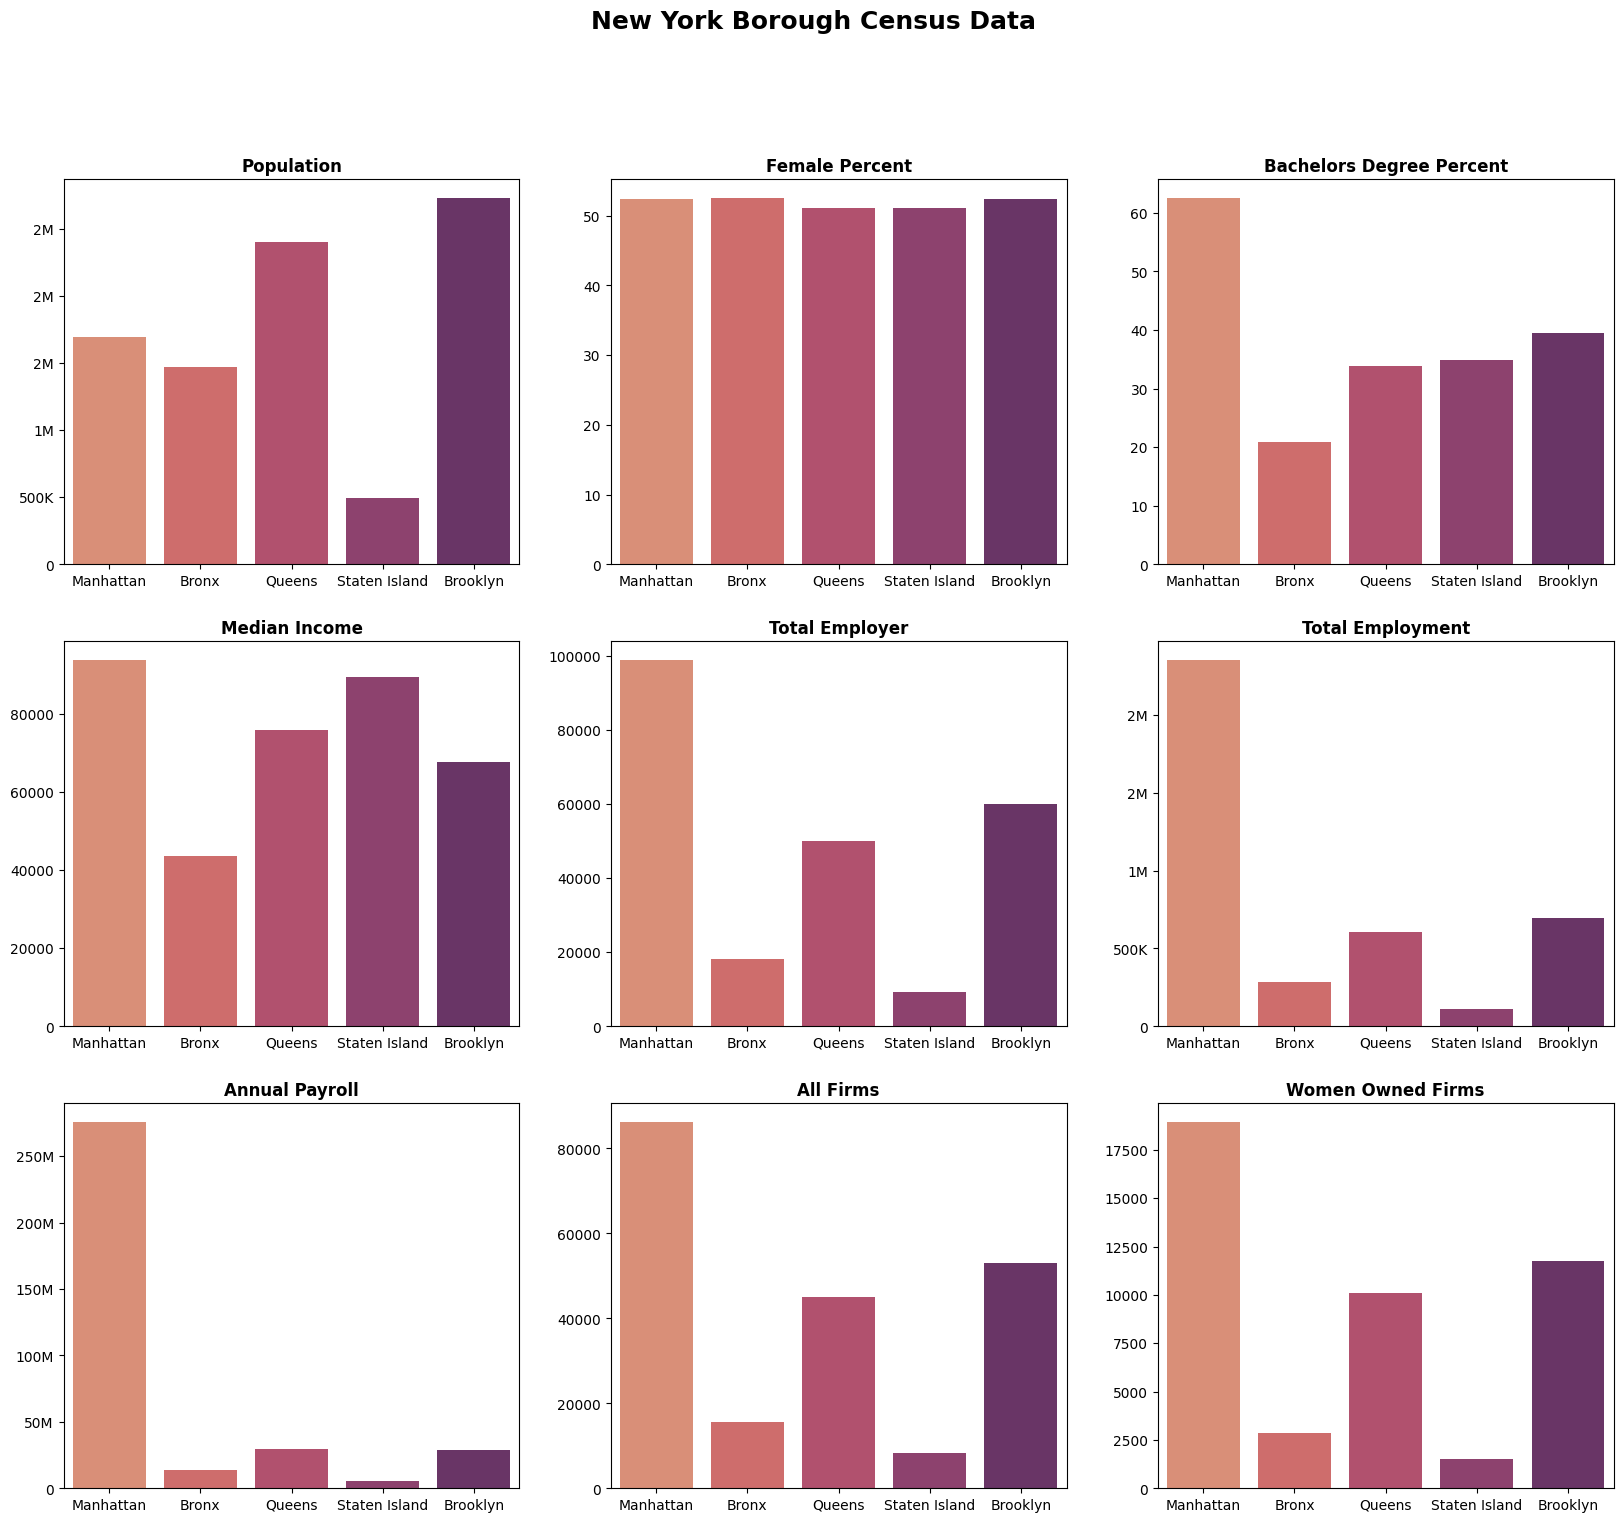

In [ ]:

plt.figure(figsize=[20,17])
plt.style.use('default')


plt.suptitle('New York Borough Census Data',fontsize = 18, weight = "bold", c = "Black")

plt.subplot(3,3,1) 
ax = sns.barplot(x = "Borough", y = "Population", data = cencus, palette = 'flare')
plt.xlabel(""), plt.ylabel("")
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
plt.title('Population', weight = "bold");

plt.subplot(3,3,2)
ax = sns.barplot(x = "Borough", y = "FemalePercent", data = cencus, palette = 'flare')
plt.xlabel(""), plt.ylabel("")
plt.title('Female Percent', weight = "bold");


plt.subplot(3,3,3) 
ax = sns.barplot(x="Borough", y="BachelorsDegreePercent", data=cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('Bachelors Degree Percent', weight="bold");

plt.subplot(3,3,4) 
ax = sns.barplot(x = "Borough", y = "MedianIncome", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('Median Income', weight="bold");

plt.subplot(3,3,5) 
ax = sns.barplot(x = "Borough", y = "TotalEmployer", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('Total Employer', weight="bold");

plt.subplot(3,3,6) 
ax = sns.barplot(x = "Borough", y = "TotalEmployment", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
plt.title('Total Employment', weight="bold");

plt.subplot(3,3,7) 
ax = sns.barplot(x = "Borough", y = "AnnualPayroll", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
plt.title('Annual Payroll', weight="bold");

plt.subplot(3,3,8) 
ax = sns.barplot(x = "Borough", y = "AllFirms", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('All Firms', weight = "bold");

plt.subplot(3,3,9) 
ax = sns.barplot(x = "Borough", y = "WomenOwnedFirms", data = cencus, palette = 'flare')
plt.xlabel(""),plt.ylabel("")
plt.title('Women Owned Firms', weight = "bold");

plt.savefig('NewyorkBoroughCensusData.png', dpi=200)